# Jupyter notebook sample

In [14]:
%pip install torch
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install torchvision
%pip install tqdm
import os
import copy
import json
import random
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tqdm.auto import tqdm
from torch import optim
from torchvision import datasets
from torchvision import models
from torch.autograd import Variable
from torchvision import transforms, utils


import ssl
ssl._create_default_https_context = ssl._create_unverified_context


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 ->

### Interactive tables

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

In [77]:
with open('plantnet300K_species_names.json', 'r') as f:
    species_names = json.load(f) 



data_dir = 'plantnet_300K'
train_dir = os.path.join(data_dir, 'images_train')
val_dir = os.path.join(data_dir, 'images_val')
test_dir = os.path.join(data_dir, 'images_test')

print("hi")

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((256, 256)),  
        transforms.RandomRotation(10), 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(), 
    ]),
    'val': transforms.Compose([
        transforms.Resize((256, 256)),  
        transforms.ToTensor(), 
    ]),
    'test': transforms.Compose([
        transforms.Resize((256, 256)),  
        transforms.ToTensor(), 
    ])
}

image_datasets = {
    'train': datasets.ImageFolder(train_dir, data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, data_transforms['val']),
    'test': datasets.ImageFolder(test_dir, data_transforms['test'])
}

batch_size = 32 
dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False)
}
print("Hello")

hi
Hello


In [ ]:
# data_dir = 'data/plantnet_300K'
# train_dir = os.path.join(data_dir, 'images_train')
# val_dir = os.path.join(data_dir, 'images_val')
# test_dir = os.path.join(data_dir, 'images_test')
# 
# 
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((256, 256)),  
#         transforms.RandomRotation(10), 
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(), 
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((256, 256)),  
#         transforms.ToTensor(),  
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize((256, 256)),  
#         transforms.ToTensor(),  
#     ])
# }
# 
# def limit_dataset_size(dataset_dir, max_images):
#     images = os.listdir(dataset_dir)
#     if len(images) > max_images:
#         images = images[:max_images]
#     return images
# 
# image_datasets = {
#     'train': datasets.ImageFolder(train_dir, transform=data_transforms['train'],
#                                   loader=lambda x: Image.open(x).convert("RGB"),
#                                   target_transform=None, is_valid_file=None,
#                                   extensions=None, limit_dataset_size(train_dir, 1500)),
#     'val': datasets.ImageFolder(val_dir, transform=data_transforms['val'],
#                                 loader=lambda x: Image.open(x).convert("RGB"),
#                                 target_transform=None, is_valid_file=None,
#                                 extensions=None, limit_dataset_size(val_dir, 1500)),
#     'test': datasets.ImageFolder(test_dir, transform=data_transforms['test'],
#                                  loader=lambda x: Image.open(x).convert("RGB"),
#                                  target_transform=None, is_valid_file=None,
#                                  extensions=None, limit_dataset_size(test_dir, 1500))
# }
# 
# 
# batch_size = 32  
# dataloaders = {
#     'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True),
#     'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False),
#     'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False)
# }

### Visualization in DataSpell

Create graphs and visualizations that match your chosen color scheme.

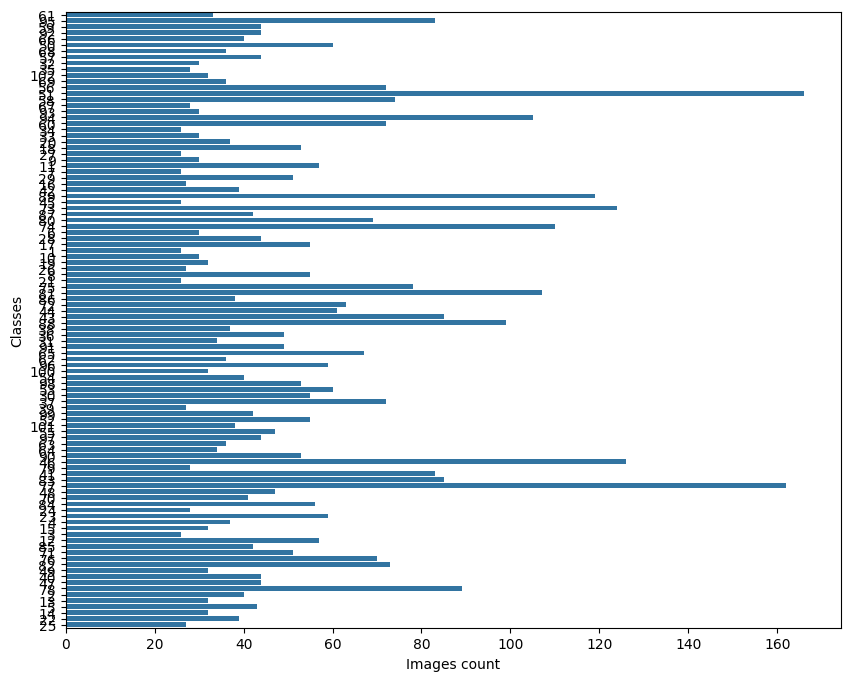

In [78]:
class_counts = {
    class_: len(os.listdir(os.path.join(train_dir, class_)))
    for class_ in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, class_))
}
plt.figure(figsize=(10, 8))

sns.barplot(x=list(class_counts.values()), y=list(class_counts.keys()))
plt.xlabel('Images count')
plt.ylabel('Classes')
plt.show()

In [79]:
classes_counts = len(image_datasets['train'].classes)

print(f"Number of classes: {classes_counts}")

Number of classes: 102


In [82]:
 print(len(dataloaders["train"].dataset))
 print(len(dataloaders["train"]))
 print(len(dataloaders["val"]))

5349
168
83


In [83]:
class_sample_counts = [len(os.listdir(os.path.join(train_dir, class_)))
                       for class_ in os.listdir(train_dir)
                       if os.path.isdir(os.path.join(train_dir, class_))]
class_weights = 1 / torch.tensor(class_sample_counts, dtype=torch.float)
print(class_weights)

tensor([0.0303, 0.0120, 0.0227, 0.0227, 0.0250, 0.0167, 0.0278, 0.0227, 0.0333,
        0.0357, 0.0312, 0.0278, 0.0139, 0.0060, 0.0135, 0.0357, 0.0333, 0.0095,
        0.0139, 0.0385, 0.0333, 0.0270, 0.0189, 0.0385, 0.0333, 0.0175, 0.0385,
        0.0196, 0.0370, 0.0256, 0.0084, 0.0385, 0.0081, 0.0238, 0.0145, 0.0091,
        0.0333, 0.0227, 0.0182, 0.0385, 0.0333, 0.0312, 0.0370, 0.0182, 0.0385,
        0.0128, 0.0093, 0.0263, 0.0159, 0.0164, 0.0118, 0.0101, 0.0270, 0.0204,
        0.0294, 0.0204, 0.0149, 0.0278, 0.0169, 0.0312, 0.0250, 0.0189, 0.0167,
        0.0182, 0.0139, 0.0370, 0.0238, 0.0182, 0.0263, 0.0213, 0.0227, 0.0278,
        0.0294, 0.0189, 0.0079, 0.0357, 0.0120, 0.0118, 0.0062, 0.0213, 0.0244,
        0.0179, 0.0357, 0.0169, 0.0270, 0.0312, 0.0385, 0.0175, 0.0238, 0.0196,
        0.0143, 0.0137, 0.0312, 0.0227, 0.0227, 0.0112, 0.0250, 0.0312, 0.0233,
        0.0312, 0.0256, 0.0370])


In [84]:
from torch.utils.data import WeightedRandomSampler

class_sample_counts = [len(os.listdir(os.path.join(train_dir, class_)))
for class_ in os.listdir(train_dir)
    if os.path.isdir(os.path.join(train_dir, class_))]
class_weights = 1 / torch.tensor(class_sample_counts, dtype=torch.float)
print(class_weights)
print(max(class_sample_counts))
print(min(class_sample_counts))
sampler = WeightedRandomSampler(weights=class_weights, num_samples=len(image_datasets['train']), replacement=False)

oversampled_dataloader = torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, sampler=sampler)

tensor([0.0303, 0.0120, 0.0227, 0.0227, 0.0250, 0.0167, 0.0278, 0.0227, 0.0333,
        0.0357, 0.0312, 0.0278, 0.0139, 0.0060, 0.0135, 0.0357, 0.0333, 0.0095,
        0.0139, 0.0385, 0.0333, 0.0270, 0.0189, 0.0385, 0.0333, 0.0175, 0.0385,
        0.0196, 0.0370, 0.0256, 0.0084, 0.0385, 0.0081, 0.0238, 0.0145, 0.0091,
        0.0333, 0.0227, 0.0182, 0.0385, 0.0333, 0.0312, 0.0370, 0.0182, 0.0385,
        0.0128, 0.0093, 0.0263, 0.0159, 0.0164, 0.0118, 0.0101, 0.0270, 0.0204,
        0.0294, 0.0204, 0.0149, 0.0278, 0.0169, 0.0312, 0.0250, 0.0189, 0.0167,
        0.0182, 0.0139, 0.0370, 0.0238, 0.0182, 0.0263, 0.0213, 0.0227, 0.0278,
        0.0294, 0.0189, 0.0079, 0.0357, 0.0120, 0.0118, 0.0062, 0.0213, 0.0244,
        0.0179, 0.0357, 0.0169, 0.0270, 0.0312, 0.0385, 0.0175, 0.0238, 0.0196,
        0.0143, 0.0137, 0.0312, 0.0227, 0.0227, 0.0112, 0.0250, 0.0312, 0.0233,
        0.0312, 0.0256, 0.0370])
166
26


In [89]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

model = models.resnet50(pretrained=True)
print("model")

for param in model.parameters():
    param.requires_grad = False


num_features = model.fc.in_features
model.fc = nn.Linear(num_features, classes_counts)
model = model.to(device)

class_weights = torch.tensor([1 / len(os.listdir(os.path.join(train_dir, class_)))
                              for class_ in os.listdir(train_dir)
                              if os.path.isdir(os.path.join(train_dir, class_))])

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001) 
print("end")

Using device: mps
model
end


In [90]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs=100, patience=5):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    epochs_no_improve = 0

  
    model = model.float()

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                max_batches = 168
            else:
                model.eval()
                max_batches = 83

            running_loss = 0.0
            running_corrects = 0

            
            
            for batch_idx, (inputs, labels) in enumerate(dataloaders[phase]):
                print(batch_idx, end=" ")
                if batch_idx >= max_batches:
                    print()
                    break
                inputs = inputs.to(device).float()
                labels = labels.to(device)

                optimizer.zero_grad()

               
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()  
                        optimizer.step()  

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

           
            epoch_loss = running_loss / (max_batches * 32)
            epoch_acc = running_corrects.float() / (max_batches * 32)
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    epochs_no_improve = 0  
                    torch.save(model.state_dict(), 'model_best_accuracy.pth')
                    print(f"Best model saved with accuracy: {best_acc:.4f}")
                else:
                    epochs_no_improve += 1  

                if epochs_no_improve == patience:
                    print(f'Early stopping after {epoch + 1} epochs. No improvement in validation accuracy.')
                    model.load_state_dict(best_model_wts)
                    return model

    model.load_state_dict(best_model_wts)
    return model

In [91]:
best_model = train_model(
    model=model, 
    criterion=criterion,  
    optimizer=optimizer,  
    dataloaders=dataloaders, 
    num_epochs=30, 
    patience=6 
)

Epoch 1/30
----------
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 train Loss: 2.6494 Acc: 0.4693
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 val Loss: 1.3352 Acc: 0.7176
Best model saved with accuracy: 0.7176
Epoch 2/30
----------
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 

In [92]:
model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, classes_counts)

model = model.to(device)

model.load_state_dict(torch.load('model_best_accuracy.pth'))

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [74]:
def evaluate_model(model, dataloader):
    corrects = 0
    total = 0
  
    with torch.no_grad():
        for inputs, names in tqdm(dataloader):
            inputs = inputs.to(device)
            names = names.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            corrects += torch.sum(preds == names.data).item()
            total += names.size(0)

    return corrects / total

In [93]:
valid_accuracy = evaluate_model(model, dataloaders['val'])
print(f'Validation set accuracy: {valid_accuracy:.4f}')

test_accuracy = evaluate_model(model, dataloaders['test'])
print(f'Test set accuracy: {test_accuracy:.4f}')

100%|███████████████████████████████████████████| 83/83 [00:25<00:00,  3.32it/s]


Validation set accuracy: 0.9182


100%|█████████████████████████████████████████████| 6/6 [00:02<00:00,  2.84it/s]

Test set accuracy: 0.9355


In [94]:
print(f'Test set accuracy: {test_accuracy:.4f}')
print(f'Validation set accuracy: {valid_accuracy:.4f}')

Test set accuracy: 0.9355
Validation set accuracy: 0.9182


Real class name: pincushion flower


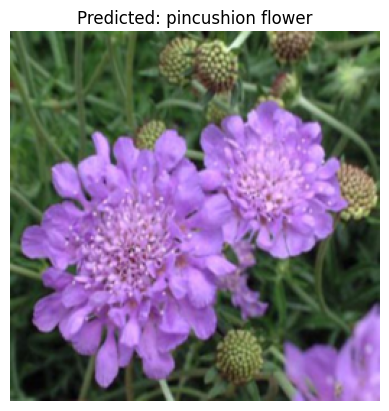

In [95]:
random_idx = random.randint(0, len(image_datasets['test']) - 1)
image, name = image_datasets['test'][random_idx]

image_to_show = transforms.ToPILImage()(image)

image = image.unsqueeze(0)  
image = Variable(image.to(device)) 


model.eval()

outputs = model(image)
_, preds = torch.max(outputs, 1)

predicted = image_datasets['test'].classes[preds[0]]

classId = image_datasets['test'].classes[name]
name_real = species_names[classId]
print(f"Real class name: {name_real}")

plt.imshow(image_to_show)
plt.title(f"Predicted: {species_names[predicted]}")  
plt.axis('off')  
plt.show()

In [97]:
outputs

tensor([[-14.2796, -12.0473,  -7.4109, -17.0970, -15.9591, -13.3003, -16.8889,
         -13.7108,  -7.5197, -21.9430, -22.0974, -12.7297, -16.0291, -19.2309,
         -13.5302, -21.7385, -17.7511,   0.5708, -14.3255, -21.6300, -10.6340,
         -12.9983, -12.3497, -15.7692, -12.6381, -12.9369,  -7.4107,  -8.0267,
          -5.8082, -14.5044,  -9.3286, -11.0383, -18.8442, -14.4501,  -4.2391,
         -19.1929, -15.3620, -11.8159,  -7.6398, -24.0749, -18.1346, -23.3340,
         -13.6740, -20.9671,  -5.8047, -17.3320, -10.2945, -11.8599, -16.2759,
          -4.8905, -15.0553, -10.7413, -12.9514, -18.6294, -21.5213, -20.6170,
         -15.6608, -13.8229, -13.7419, -14.7101, -26.0272,  -6.7896, -16.5960,
         -17.6964, -17.6415, -11.8954, -15.7445, -10.7309, -14.1845, -24.9947,
         -10.8949,  -9.6232, -11.7951, -14.1661, -20.9115, -24.5905, -18.7609,
         -16.3910, -14.8875, -11.0840, -26.5968, -23.9858, -23.9158, -10.8147,
         -14.6446, -17.5177, -14.3537, -12.6560, -17